In [132]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Importing citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


593

In [142]:
# Calling the openweathermap url and setting units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Creating open lists for data
city_list=[]
lat=[]
lng=[]
max_t=[]
hum=[]
cld=[]
wd_spd=[]
ctry=[]
date=[]

count_one = 1 

#Starting Data retreival for randomized cities
print(f'Beginning Data Retrieval')
print(f'--------------------')
for city in cities:
        
    try:
        query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        city_list.append(weather_json['name'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_t.append(weather_json['main']['temp_max'])
        hum.append(weather_json['main']['humidity'])
        cld.append(weather_json['clouds']['all'])
        wd_spd.append(weather_json['wind']['speed'])
        ctry.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])

        print(f'Processing Record {count_one} of {len(cities)} | {city}')
        count_one +=1
    except:
        print(f'City not found. Skipping...')
        count_one +=1
        
print(f'--------------------')
print(f'Data Retreival Complete')
print(f'--------------------')

Beginning Data Retrieval
--------------------
Processing Record 1 of 593 | nantucket
Processing Record 2 of 593 | port alfred
Processing Record 3 of 593 | badajoz
Processing Record 4 of 593 | boshnyakovo
Processing Record 5 of 593 | aljezur
Processing Record 6 of 593 | barrow
Processing Record 7 of 593 | ushuaia
Processing Record 8 of 593 | busselton
Processing Record 9 of 593 | rikitea
Processing Record 10 of 593 | kardla
City not found. Skipping...
Processing Record 12 of 593 | lagos
Processing Record 13 of 593 | castro
Processing Record 14 of 593 | punta arenas
Processing Record 15 of 593 | yellowknife
Processing Record 16 of 593 | ojinaga
Processing Record 17 of 593 | taoudenni
City not found. Skipping...
Processing Record 19 of 593 | mahebourg
Processing Record 20 of 593 | luderitz
Processing Record 21 of 593 | cabo san lucas
Processing Record 22 of 593 | cherskiy
Processing Record 23 of 593 | kahului
Processing Record 24 of 593 | matamoros
City not found. Skipping...
Processing R

City not found. Skipping...
City not found. Skipping...
Processing Record 213 of 593 | lorengau
Processing Record 214 of 593 | ostrovnoy
Processing Record 215 of 593 | chadiza
City not found. Skipping...
Processing Record 217 of 593 | upernavik
Processing Record 218 of 593 | hudson bay
Processing Record 219 of 593 | kasongo-lunda
Processing Record 220 of 593 | ahipara
Processing Record 221 of 593 | rawson
Processing Record 222 of 593 | sciacca
City not found. Skipping...
Processing Record 224 of 593 | abu samrah
City not found. Skipping...
Processing Record 226 of 593 | kabare
Processing Record 227 of 593 | nakuru
Processing Record 228 of 593 | south lake tahoe
Processing Record 229 of 593 | liverpool
Processing Record 230 of 593 | mandali
Processing Record 231 of 593 | komsomolskiy
Processing Record 232 of 593 | boa vista
Processing Record 233 of 593 | assiniboia
Processing Record 234 of 593 | laguna
Processing Record 235 of 593 | torbay
Processing Record 236 of 593 | manta
Processing

Processing Record 421 of 593 | banda aceh
Processing Record 422 of 593 | bundu
Processing Record 423 of 593 | luena
Processing Record 424 of 593 | longyearbyen
Processing Record 425 of 593 | tigil
Processing Record 426 of 593 | zhurivka
City not found. Skipping...
Processing Record 428 of 593 | ribeira grande
Processing Record 429 of 593 | hirara
Processing Record 430 of 593 | bambous virieux
Processing Record 431 of 593 | kungurtug
Processing Record 432 of 593 | ormara
Processing Record 433 of 593 | pervomayskoye
Processing Record 434 of 593 | ngama
Processing Record 435 of 593 | calama
Processing Record 436 of 593 | natal
Processing Record 437 of 593 | vila do maio
Processing Record 438 of 593 | havoysund
Processing Record 439 of 593 | ulladulla
Processing Record 440 of 593 | pangnirtung
Processing Record 441 of 593 | berlevag
Processing Record 442 of 593 | itoman
Processing Record 443 of 593 | beisfjord
Processing Record 444 of 593 | muzhi
Processing Record 445 of 593 | rokiskis
Pro

In [143]:
# Creating data dictionary with the variables taken from the data pull
city_data ={'City':city_list,
            'Lat':lat,
            'Lng':lng,
            'Max Temp':max_t,
            'Humidity':hum,
            'Cloudiness':cld,
            'Wind Speed':wd_spd,
            'Country':ctry,
            'Date':date}

In [144]:
# Creating new data frame from dictionary
raw_df=pd.DataFrame(city_data)
raw_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [145]:
# Outputting df to csv for later consumption
raw_df.to_csv(output_data_file)

In [146]:
# Checking df values
raw_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nantucket,41.28,-70.10,75.20,83,1,9.17,US,1596287482
1,Port Alfred,-33.59,26.89,65.80,60,0,8.90,ZA,1596287706
2,Badajoz,38.67,-6.17,96.01,14,0,5.01,ES,1596287706
3,Boshnyakovo,49.63,142.17,58.48,93,100,9.13,RU,1596287706
4,Aljezur,37.32,-8.80,84.99,44,3,13.73,PT,1596287707


In [147]:
# Looking at df numbers, id'ing max humidity greater than 100
raw_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02
mean,19.932325,16.113081,71.468598,68.455720,46.431734,8.111956,1.596288e+09
std,32.889862,91.708410,14.445043,21.835904,39.450078,5.684526,7.017644e+01
min,-54.800000,-175.200000,33.800000,6.000000,0.000000,0.360000,1.596287e+09
25%,-6.102500,-66.770000,60.850000,57.000000,1.000000,3.985000,1.596288e+09
50%,24.940000,20.310000,73.400000,75.000000,40.000000,6.800000,1.596288e+09
75%,47.475000,97.387500,80.920000,83.750000,90.000000,10.737500,1.596288e+09
max,78.220000,179.320000,115.340000,100.000000,100.000000,31.210000,1.596288e+09


In [148]:
# Creating new df for scatter plots
lat=raw_df['Lat']
temp=raw_df['Max Temp']
hum=raw_df['Humidity']
cldy=raw_df['Cloudiness']
wd_spd=raw_df['Wind Speed']

parsed_df=pd.DataFrame({'Lat':lat,
                        'Max Temp':temp,
                        'Humidity':hum,
                        'Cloudiness':cldy,
                        'Wind Speed':wd_spd})

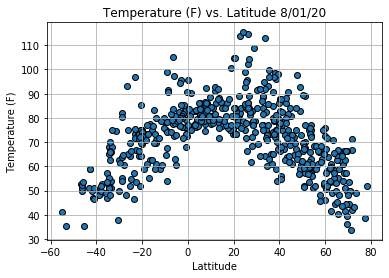

In [163]:
# Scatter plot of temp v lat
plt.scatter(lat,temp,marker='o',alpha=1,edgecolors='black')
plt.title('Temperature (F) vs. Latitude 8/01/20')
plt.xlabel('Lattitude')
plt.ylabel('Temperature (F)')
plt.grid()
plt.savefig('output_data/temp_lat.png')
plt.show()

The temperature vs latitude plot very clearly shows that as you get closer to the equator, zero latitude, the max temperature rises significantly, though areas around 20-30 latitude can be a bit hotter.

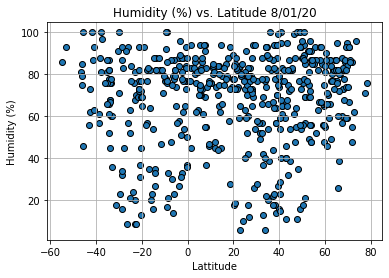

In [164]:
# Scatter plot of humidity v latitude
plt.scatter(lat,hum,marker='o',alpha=1,edgecolors='black')
plt.title('Humidity (%) vs. Latitude 8/01/20')
plt.xlabel('Lattitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('output_data/humidity_lat.png')
plt.show()

The humidity v latitude plot illustrates that most of the globe, north to south, experiences humidity levels on the 60 - 90 range, but, areas of latitude 20 - 40, plus or minus, tend to see a significant drop in humidity this time of year.

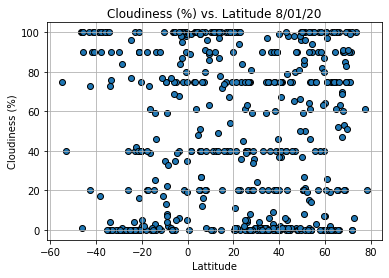

In [165]:
# Scatter plot of cloudiness v latitude
plt.scatter(lat,cldy,marker='o',alpha=1,edgecolors='black')
plt.title('Cloudiness (%) vs. Latitude 8/01/20')
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('output_data/cloudy_lat.png')
plt.show()

The cloudiness plot shows that there is really no significant trend in cloudiness vs latitude this time of year

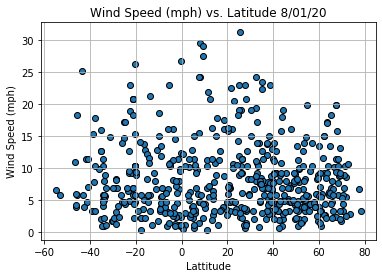

In [166]:
# Scatter plot of wind speed vs latitude
plt.scatter(lat,wd_spd,marker='o',alpha=1,edgecolors='black')
plt.title('Wind Speed (mph) vs. Latitude 8/01/20')
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('output_data/wind_lat.png')
plt.show()

The scatter plot of wind speed v latitude shows that, in general, wind speeds are consistent accross the globe, up to about 15 mph, though there does seem to be a trend of higher wind speeds occurring in the southern hemisphere more than the northern, this time of year.  This could be attributed to the fact that the southern hemisphere is in winter so data for the northern hemisphere in the winter should be gathered to confirm that trend

In [167]:
# Creating two df's to split out southern and northern hemisphere
city_so=parsed_df[parsed_df['Lat']<0]
city_no=parsed_df[parsed_df['Lat']>0]

In [168]:
# Creating a function to create a linear regression plot
def linear_regress_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values,marker='o',alpha=1,edgecolors='black')
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values),max(y_values)-10),fontsize=15,color="red")
    print('The r-squared value is ' + str(rvalue**2))

The r-squared value is 0.5405012445445174


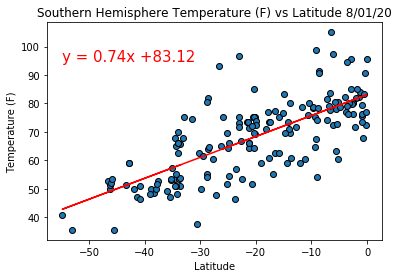

In [169]:
# Southern hemisphere temp v lat scatter plot with linear regression
linear_regress_plot(city_so['Lat'],city_so['Max Temp'])
plt.title('Southern Hemisphere Temperature (F) vs Latitude 8/01/20')
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
plt.savefig('output_data/temp_lat_so.png')
plt.show()

The r-squared value is 0.4713921083809466


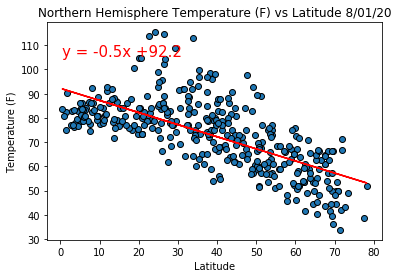

In [170]:
# Northern hemisphere temp v lat scatter plot with linear regression
linear_regress_plot(city_no['Lat'],city_no['Max Temp'])
plt.title('Northern Hemisphere Temperature (F) vs Latitude 8/01/20')
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
plt.savefig('output_data/temp_lat_no.png')
plt.show()

The r-squared value is 0.008940243393214154


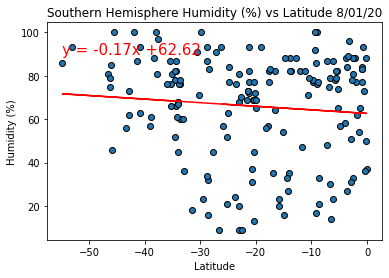

In [171]:
# Southern hemisphere humidity v lat scatter plot with linear regression
linear_regress_plot(city_so['Lat'],city_so['Humidity'])
plt.title('Southern Hemisphere Humidity (%) vs Latitude 8/01/20')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.savefig('output_data/hum_lat_so.png')
plt.show()

The r-squared value is 0.0022651270645408146


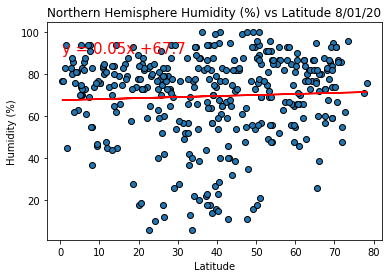

In [172]:
# Northern hemisphere humidity v lat scatter plot with linear regression
linear_regress_plot(city_no['Lat'],city_no['Humidity'])
plt.title('Northern Hemisphere Humidity (%) vs Latitude 8/01/20')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.savefig('output_data/hum_lat_no.png')
plt.show()

The r-squared value is 0.0019144663188637174


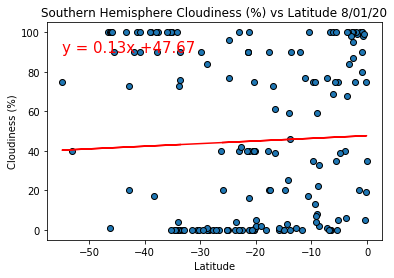

In [173]:
# Southern hemisphere cloudiness v lat scatter plot with linear regression
linear_regress_plot(city_so['Lat'],city_so['Cloudiness'])
plt.title('Southern Hemisphere Cloudiness (%) vs Latitude 8/01/20')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.savefig('output_data/cloud_lat_so.png')
plt.show()

The r-squared value is 1.0957397182256521e-06


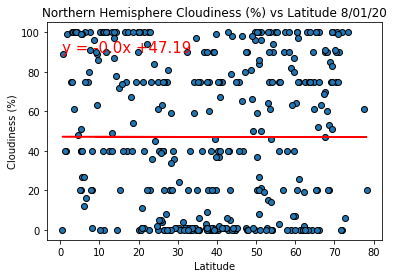

In [174]:
# Northern hemisphere cloudiness v lat scatter plot with linear regression
linear_regress_plot(city_no['Lat'],city_no['Cloudiness'])
plt.title('Northern Hemisphere Cloudiness (%) vs Latitude 8/01/20')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.savefig('output_data/cloud_lat_no.png')
plt.show()

The r-squared value is 0.0019185026979264429


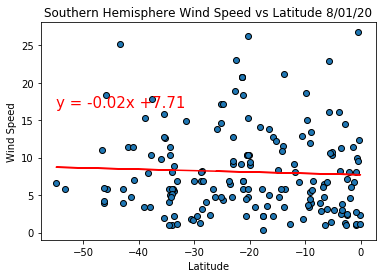

In [175]:
# Southern hemisphere wind speed v lat scatter plot with linear regression
linear_regress_plot(city_so['Lat'],city_so['Wind Speed'])
plt.title('Southern Hemisphere Wind Speed vs Latitude 8/01/20')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.savefig('output_data/wind_lat_so.png')
plt.show()

The r-squared value is 0.013189091063649412


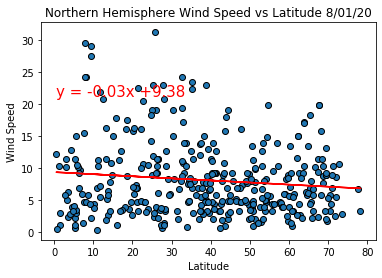

In [176]:
# Northern hemisphere wind speed v lat scatter plot with linear regression
linear_regress_plot(city_no['Lat'],city_no['Wind Speed'])
plt.title('Northern Hemisphere Wind Speed vs Latitude 8/01/20')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.savefig('output_data/wind_lat_no.png')
plt.show()